In [1]:
import xarray as xr
import movingpandas as mpd
from datetime import timedelta

## Connect to the dataset

This just queries an overview of the dataset

In [2]:
ds = xr.open_dataset(
    "https://thredds.niva.no/thredds/dodsC/datasets/norsoop/color_fantasy/merged_acdd_color_fantasy.nc"
)
ds

<xarray.Dataset>
Dimensions:          (time: 1689704)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-01T13:25:03 ... 2022-12-31...
    latitude         (time) float64 ...
    longitude        (time) float64 ...
Data variables:
    temperature      (time) float64 ...
    salinity         (time) float64 ...
    oxygen_sat       (time) float64 ...
    temperature_qc   (time) int8 ...
    salinity_qc      (time) int8 ...
    oxygen_sat_qc    (time) int8 ...
    trajectory_name  |S64 ...
Attributes: (12/45)
    title:                                        FerryBox on MS Color Fantasy
    summary:                                      The FerryBox system measure...
    title_no:                                     FerryBox på MS Color Fantasy
    summary_no:                                   Ferrybox-systemet måler som...
    date_created:                                 2024-06-18T11:41:25Z
    keywords:                                     GCMDSK:EARTH SCIENCE > OCEA...
    ...                                           ...
    creator_name:                                 Norwegian Institute for Wat...
    publisher_institution:                        Norwegian Institute for Wat...
    collection:                                   GEONOR, NMDC
    THREDDSMetadata_services_opendap_service:     https://thredds.niva.no/thr...
    THREDDSMetadata_services_httpserver_service:  https://thredds.niva.no/thr...
    DODS_EXTRA.Unlimited_Dimension:               time

# Plot temperature

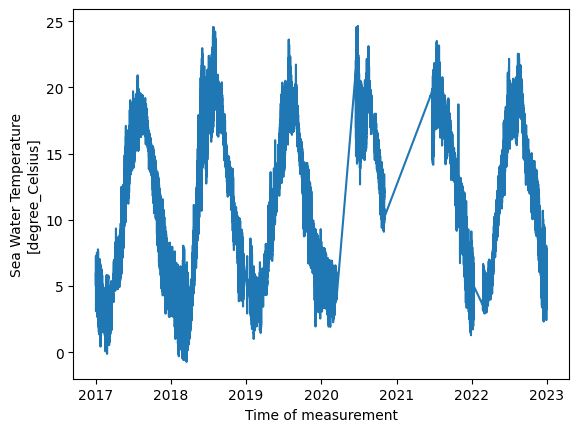

In [ ]:
ds.temperature.plot()

# Connect to Glømma dataset and plot temperature

In [7]:
ds_gl = xr.open_dataset("https://thredds.niva.no/thredds/dodsC/datasets/loggers/glomma/baterod.nc")
ds_gl.head()

<xarray.Dataset>
Dimensions:           (time: 5)
Coordinates:
    longitude         float64 ...
    latitude          float64 ...
  * time              (time) datetime64[ns] 2023-02-02T15:00:00 ... 2023-02-0...
Data variables:
    station_name      |S64 ...
    temp_water_avg    (time) float64 ...
    phvalue_avg       (time) float64 ...
    condvalue_avg     (time) float64 ...
    turbidity_avg     (time) float64 ...
    cdomdigitalfinal  (time) float64 ...
Attributes: (12/36)
    id:                                        no.niva:af047ff6-e92a-47a0-a9a...
    featureType:                               timeSeries
    title:                                     Sensor station at Baterød in G...
    summary:                                   Water quality sensor measureme...
    title_no:                                  Sensorstasjon ved Baterød i ne...
    summary_no:                                Vannkvalitets målinger fra sen...
    ...                                        ...
    publisher_url:                             https://niva.no
    license:                                   http://spdx.org/licenses/CC-BY...
    iso_topic_category:                        inlandWaters
    history:                                   Built with dscreator
    collection:                                ADC
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...

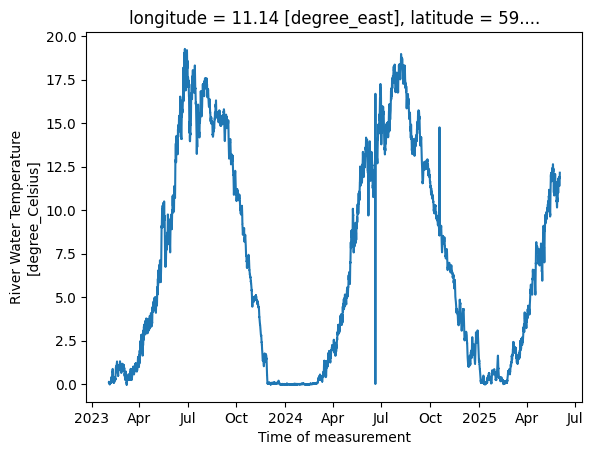

In [8]:
ds_gl.temp_water_avg.plot()